# Final Assignment Of Loan Dataset

# Importing The Libraries

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [263]:
#resding the csv file
data=pd.read_csv("loan_train.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [264]:
#sorting the values by gender
data=data.sort_values(by=['Gender'], inplace=False,ascending=False)
data

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
160,189,189,PAIDOFF,800,15,9/12/2016,9/26/2016,42,college,male
236,274,274,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,Bechalor,male
235,273,273,PAIDOFF,1000,30,9/14/2016,10/13/2016,35,High School or Below,male
234,272,272,PAIDOFF,1000,30,9/14/2016,11/12/2016,28,college,male
...,...,...,...,...,...,...,...,...,...,...
121,143,143,PAIDOFF,800,15,9/11/2016,9/25/2016,33,college,female
285,334,334,COLLECTION,1000,30,9/11/2016,10/10/2016,38,college,female
284,333,333,COLLECTION,1000,30,9/11/2016,10/10/2016,30,High School or Below,female
210,245,245,PAIDOFF,1000,30,9/13/2016,10/12/2016,19,High School or Below,female


In [265]:
data.size

3460

In [266]:
data.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

C:\Users\israr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

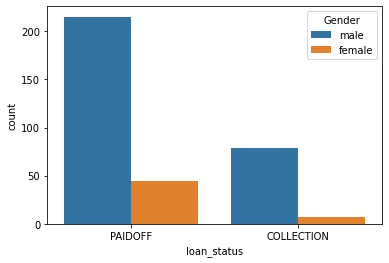

In [267]:
sns.countplot(data.loan_status,hue=data.Gender)

In [268]:
#prerocessing (encdoing technique)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label=LabelEncoder()
data["Gender"]=label.fit_transform(data["Gender"])

In [269]:

data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,1
160,189,189,PAIDOFF,800,15,9/12/2016,9/26/2016,42,college,1
236,274,274,PAIDOFF,1000,30,9/14/2016,10/13/2016,30,Bechalor,1
235,273,273,PAIDOFF,1000,30,9/14/2016,10/13/2016,35,High School or Below,1
234,272,272,PAIDOFF,1000,30,9/14/2016,11/12/2016,28,college,1


In [270]:
feature=data.drop(columns=["loan_status"])
target=data[["loan_status"]]

In [271]:
target

,loan_status
0,PAIDOFF
160,PAIDOFF
236,PAIDOFF
235,PAIDOFF
234,PAIDOFF
...,...
121,PAIDOFF
285,COLLECTION
284,COLLECTION
210,PAIDOFF


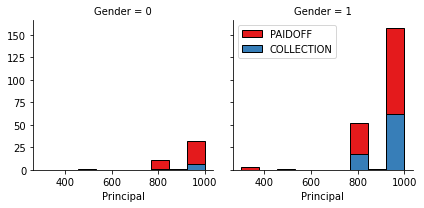

In [272]:
bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [273]:
data.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender             int32
dtype: object

In [274]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])

In [275]:
data.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int32
dtype: object

In [276]:
feature=data.drop(columns=["loan_status","education","effective_date","due_date"]).values
target=data[["loan_status"]].values

In [277]:
test=pd.read_csv("loan_test.csv")
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [278]:
test=test.sort_values(by=['Gender'], inplace=False,ascending=False)

In [279]:
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
27,179,179,PAIDOFF,1000,30,9/12/2016,10/11/2016,46,college,male
25,167,167,PAIDOFF,800,30,9/12/2016,10/11/2016,28,college,male
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
28,186,186,PAIDOFF,1000,30,9/12/2016,10/11/2016,33,Bechalor,male
29,196,196,PAIDOFF,1000,30,9/12/2016,11/10/2016,29,college,male


In [280]:
test["Gender"]=label.fit_transform(test["Gender"])

In [281]:
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
27,179,179,PAIDOFF,1000,30,9/12/2016,10/11/2016,46,college,1
25,167,167,PAIDOFF,800,30,9/12/2016,10/11/2016,28,college,1
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,1
28,186,186,PAIDOFF,1000,30,9/12/2016,10/11/2016,33,Bechalor,1
29,196,196,PAIDOFF,1000,30,9/12/2016,11/10/2016,29,college,1


In [282]:
test_feature=test.drop(columns=["loan_status","education","effective_date","due_date"]).values
test_target=test.loan_status.values

In [283]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [284]:
logistic=LogisticRegression()
logistic.fit(feature,target)
y_pred=logistic.predict(test_feature)

C:\Users\israr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [285]:
print("confusion_matrix:",confusion_matrix(test_target,y_pred))
print(accuracy_score(test_target,y_pred))

confusion_matrix: [[14  0]
 [ 0 40]]
1.0


<AxesSubplot:>

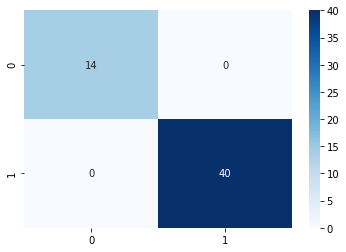

In [286]:
sns.heatmap(confusion_matrix(test_target,y_pred),annot=True,cmap="Blues")

In [287]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(feature,target)
pred=decision.predict(test_feature)

In [288]:
print("confusion_matrix:",confusion_matrix(test_target,pred))
print(accuracy_score(test_target,pred))

confusion_matrix: [[14  0]
 [ 0 40]]
1.0


<AxesSubplot:>

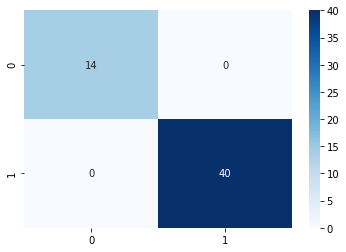

In [289]:
sns.heatmap(confusion_matrix(test_target,pred),annot=True,cmap="Blues")

In [290]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(feature,target)
predic=decision.predict(test_feature)

C:\Users\israr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [291]:
print("confusion_matrix:",confusion_matrix(test_target,predic))
print(accuracy_score(test_target,predic))

confusion_matrix: [[14  0]
 [ 0 40]]
1.0


<AxesSubplot:>

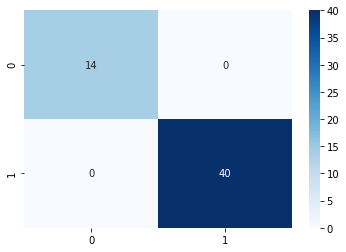

In [292]:
sns.heatmap(confusion_matrix(test_target,predic),annot=True,cmap="Blues")

In [293]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [294]:
cross_valid_score=[]
for k in range(1,50):
    Knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(Knn,feature,target,cv=10,scoring="accuracy")
    cross_valid_score.append(scores.mean())
print("K-value:",np.argmax(cross_valid_score))

C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

K-value: 3


C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [295]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(feature,target)
prediction=model.predict(test_feature)

C:\Users\israr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [296]:
print("confusion_matrix:",confusion_matrix(test_target,prediction))
print(accuracy_score(test_target,prediction))

confusion_matrix: [[13  1]
 [ 0 40]]
0.9814814814814815


<AxesSubplot:>

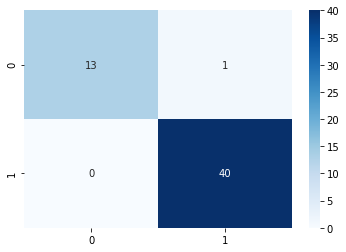

In [297]:
sns.heatmap(confusion_matrix(test_target,prediction),annot=True,cmap="Blues")

In [298]:
a=accuracy_score(test_target,y_pred)
b=accuracy_score(test_target,pred)
c=accuracy_score(test_target,predic)
d=accuracy_score(test_target,prediction)
x=pd.DataFrame({"accuracy_score":[a,b,c,d]},index=["LogisticRegression","Decision_Tree","Support_Vector_Classifier","Knn_Neighbors"])
x

,accuracy_score
LogisticRegression,1.000000
Decision_Tree,1.000000
Support_Vector_Classifier,1.000000
Knn_Neighbors,0.981481
